In [1]:
#@title Importing necessary modules

import urllib.parse
import urllib.request
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

>[Using Site Name from USGS](#scrollTo=897SdKYWqRO6)

>[Using my CSV file](#scrollTo=-r1GfeYeqI3o)

>[Flow duration](#scrollTo=qN3hRXb8u85R)

>[Baseflow](#scrollTo=Fs4tNoHydQHg)



# Using Site Name from USGS

In [2]:
#@title Determining the station ID and the dates of interest (Start and finish dates)

station_number = input("What is the USGS Station ID?\t")
start_date = input("Start Date (YYYY-MM-DD):\t")
end_date = input("End Date (YYYY-MM-DD):\t")
folder = os.getcwd()

What is the USGS Station ID?	03479000
Start Date (YYYY-MM-DD):	2010-01-01
End Date (YYYY-MM-DD):	2023-01-01


In [3]:
section1 = 'https://nwis.waterdata.usgs.gov/nwis/dv?referred_module=sw&search_site_no='
section2 = '&search_site_no_match_type=exact&site_tp_cd=OC&site_tp_cd=OC-CO&site_tp_cd=ES&site_tp_cd='\
'LK&site_tp_cd=ST&site_tp_cd=ST-CA&site_tp_cd=ST-DCH&site_tp_cd=ST-TS&index_pmcode_00060=1&group_key='\
'NONE&sitefile_output_format=html_table&column_name=agency_cd&column_name=site_no&column_name=station_nm&range_selection=date_range&begin_date='
section3 = '&end_date='
section4 = '&format=rdb&date_format=YYYY-MM-DD&rdb_compression=value&list_of_search_criteria=search_site_no%2Csite_tp_cd%2Crealtime_parameter_selection'

link = (section1 + station_number + section2 + start_date + section3 + end_date + section4)
print("Click here to see the generated USGS link: \n",link)

Click here to see the generated USGS link: 
 https://nwis.waterdata.usgs.gov/nwis/dv?referred_module=sw&search_site_no=03479000&search_site_no_match_type=exact&site_tp_cd=OC&site_tp_cd=OC-CO&site_tp_cd=ES&site_tp_cd=LK&site_tp_cd=ST&site_tp_cd=ST-CA&site_tp_cd=ST-DCH&site_tp_cd=ST-TS&index_pmcode_00060=1&group_key=NONE&sitefile_output_format=html_table&column_name=agency_cd&column_name=site_no&column_name=station_nm&range_selection=date_range&begin_date=2010-01-01&end_date=2023-01-01&format=rdb&date_format=YYYY-MM-DD&rdb_compression=value&list_of_search_criteria=search_site_no%2Csite_tp_cd%2Crealtime_parameter_selection


In [4]:
USGS_page = urllib.request.urlopen(link)
downloaded_data = USGS_page.read()
type(downloaded_data)
str_data = downloaded_data.decode()
type(str_data)
str_data
f_str_data = str_data.split('\n')
f_str_data
station_name = ''

for line in range(len(f_str_data)):
    if f_str_data[line].startswith("#    USGS"):
        station_name=f_str_data[line][3:]
print(station_name)

  USGS 03479000 WATAUGA RIVER NEAR SUGAR GROVE, NC


In [5]:
#@title Formatting the data from the USGS website and quick display
date_flow = ''

for line in range(len(f_str_data)):
    if f_str_data[line].startswith("USGS"):
        data = f_str_data[line][14:]
        columns = data.split('\t')
        rows = ','.join([columns[0],(columns[1])])
        date_flow += rows + '\n'
date_flow = date_flow.encode()

with open(folder+'/USGS_Data_for_' + station_number  + '.txt', 'wb') as text:
        text.write(date_flow)
filename = folder+'/USGS_Data_for_' + station_number  + '.txt'
columns = ['datetime','flow']
hydproj_df = pd.read_csv(filename,header=None,names=columns,parse_dates=[0])
hydproj_df=hydproj_df.set_index(['datetime'])
hydproj_df['flow']=pd.to_numeric(hydproj_df['flow'], errors='coerce')

# drop NAN values
hydproj_df.dropna(inplace = True)

# check if Dataframe contains 999 values
contains_999 = hydproj_df.eq(999).any().any()

# Print the result
if contains_999:
    print("DataFrame contains 999")
else:
    print("DataFrame does not contain 999")

hydproj_df.head()


DataFrame does not contain 999


,flow
datetime,
2010-01-01,292.0
2010-01-17,2130.0
2010-01-18,923.0
2010-01-19,696.0
2010-01-20,502.0


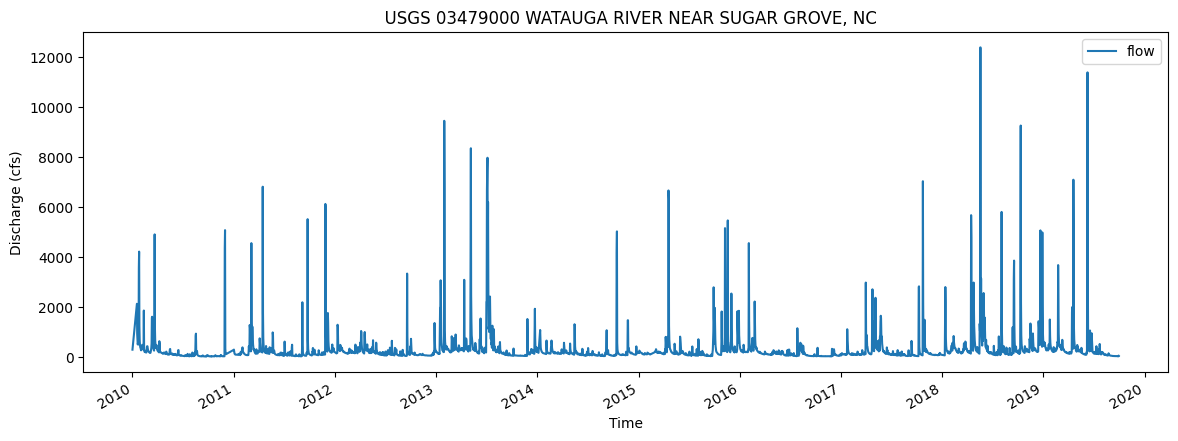

In [6]:
#@title Ploting the Discharge vs time for the selected stream
hydproj_df.plot(figsize=(14,5), title= station_name, xlabel="Time", ylabel="Discharge (cfs)");

In [7]:
#Making the date to be a columns also
#df['Discharge (cfs)'].info()

hydproj_df.reset_index(inplace=True)
hydproj_df.columns


#Spliting the date into dd-mm-yyyy
hydproj_df['day'] = hydproj_df['datetime'].dt.day
hydproj_df['month'] = hydproj_df['datetime'].dt.month
hydproj_df['year'] = hydproj_df['datetime'].dt.year

print(hydproj_df)

       datetime    flow  day  month  year
0    2010-01-01   292.0    1      1  2010
1    2010-01-17  2130.0   17      1  2010
2    2010-01-18   923.0   18      1  2010
3    2010-01-19   696.0   19      1  2010
4    2010-01-20   502.0   20      1  2010
...         ...     ...  ...    ...   ...
3394 2019-09-26    27.1   26      9  2019
3395 2019-09-27    27.1   27      9  2019
3396 2019-09-28    33.6   28      9  2019
3397 2019-09-29    54.3   29      9  2019
3398 2019-09-30    42.1   30      9  2019

[3399 rows x 5 columns]


# Flow duration

In [8]:
#@title Flow Duration Curve
import pandas as pd
import matplotlib.pyplot as plt

hydproj_df.dropna(inplace=True)

# Daily streamflow data
streamflow_data = hydproj_df.flow

#sort the data in descending order
sorted_flow = sorted(hydproj_df.flow, reverse = True)



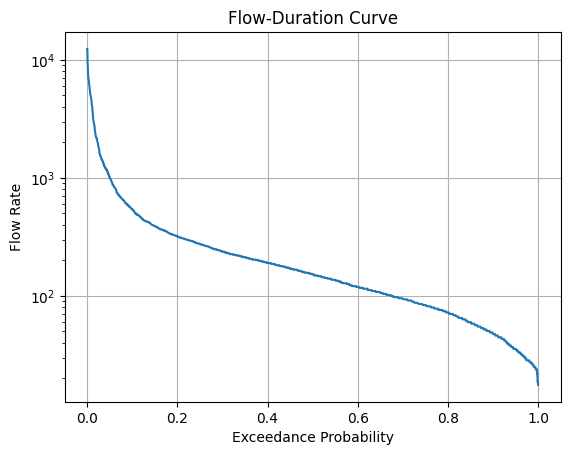

In [9]:

# Exceedance Probabilities
N = len(sorted_flow)
exceedance_probs = [1- (N - i) / (N + 1) for i in range(N)]

# Plot the flow-duration curve
plt.plot(exceedance_probs, sorted_flow)
plt.ylabel('Flow Rate')
plt.xlabel('Exceedance Probability')
plt.title('Flow-Duration Curve')
plt.yscale('log')  # Set x-axis to logarithmic scale (base 10)
# plt.gca().invert_xaxis()  # Invert x-axis to have higher flows on the left
plt.grid(True)
plt.show()

<ipython-input-10-143fb5d16644>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group = hydproj_df.groupby(['year', 'month']).mean().reset_index()


<function matplotlib.pyplot.show(close=None, block=None)>

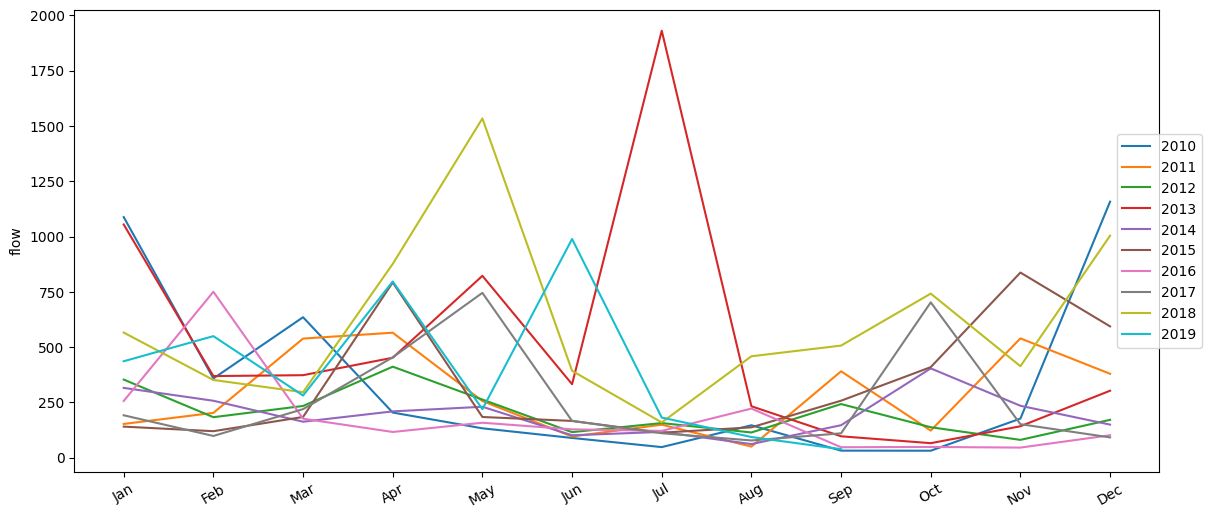

In [10]:
#@title Multi-year month by month data
group = hydproj_df.groupby(['year', 'month']).mean().reset_index()

#Sizing the graph
plt.figure(figsize=(14,6))

plt.xticks(hydproj_df['month'].unique(), rotation=30)

for year, group in group.groupby('year'):
    plt.plot(group['month'], group['flow'], label=str(year))

#Labelling axes

month_names = pd.date_range(start='2010-01-01', periods=12, freq='M').strftime('%b') # Locale’s abbreviated month name.
plt.xticks(range(1, 13), month_names, rotation= 30)

plt.legend(loc='center', bbox_to_anchor=(1, 0.5)) #Just moving the legend outside the plot
plt.ylabel('flow')


#Printing the graph
plt.show

# Methods





# Lyne and Hollick Method

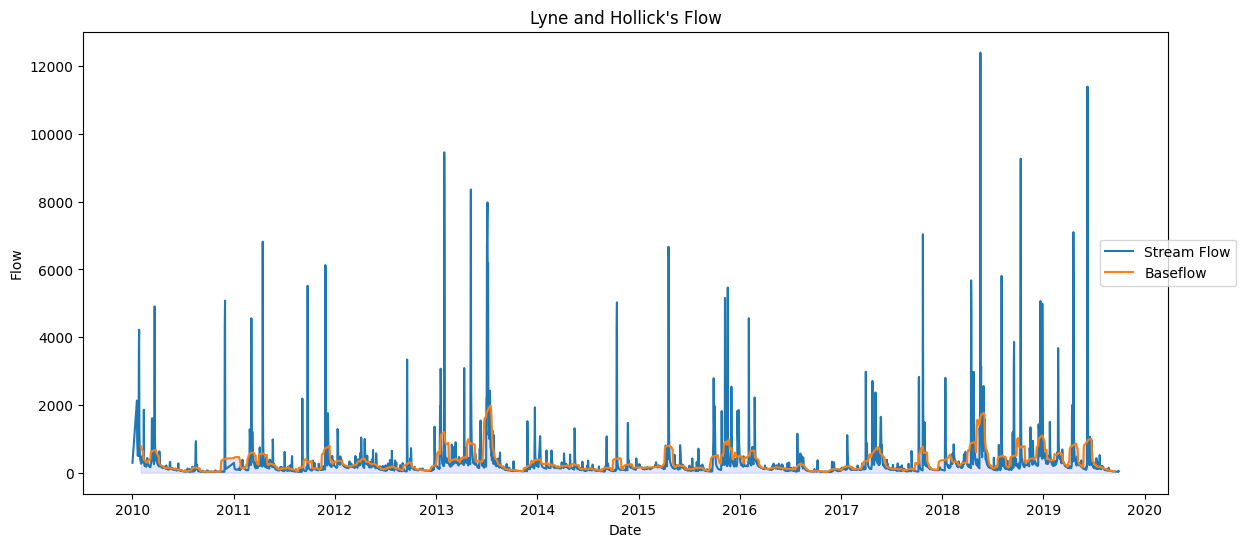

In [11]:
#@title Lyne and Hollick Method-Lucky


plt.figure(figsize=(14,6))
plt.plot(hydproj_df['datetime'], hydproj_df['flow'], label = 'Stream Flow')

# Apply a rolling average to smooth the data

roll_avg = hydproj_df['flow'].rolling(window=30, center = True).mean()

# Plot the rolling average as the baseflow
plt.plot(hydproj_df['datetime'], roll_avg, label = 'Baseflow')
plt.fill_between(hydproj_df['datetime'], roll_avg, color ='blue', alpha = 0.1)

plt.title("Lyne and Hollick's Flow")
plt.xlabel('Date')
plt.ylabel('Flow')

plt.legend(loc='center', bbox_to_anchor=(1, 0.5)) #Just moving the legend outside the plot


plt.show()




In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
#@title Lyne and Hollick- other code

def lyne_hollick(hydproj_df, k, dt):
    streamflow = hydproj_df['flow'].values
    baseflow = np.zeros(len(streamflow))
    for i in range(1, len(streamflow)):
      recession = k * dt
      if streamflow[i] <= streamflow[i-1]:
        baseflow[i] = streamflow[i]
      else:
        baseflow[i] = max(streamflow[i]- recession * (streamflow[i] - streamflow[i-1]), 0)

    quickflow = streamflow - baseflow

    return quickflow, baseflow



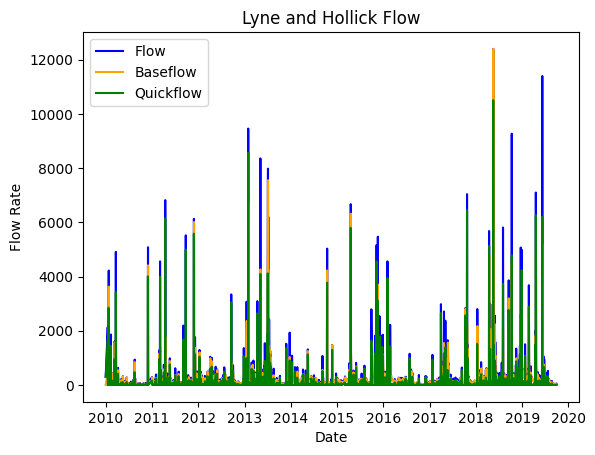

In [13]:
# Set the parameters for baseflow separation
k = 0.925  # Recession constant
dt = 1  # Time step (in days)

# Call the lyne_hollick_baseflow_separation function
quickflow, baseflow = lyne_hollick(hydproj_df, k, dt)
hydproj_df['Lyne_Hollick_baseflow'] = baseflow
flow = hydproj_df['flow'].values
time = hydproj_df['datetime']
plt.plot(time, flow, color = 'blue', label = 'Flow')
plt.plot(time, baseflow, color = 'orange', label= 'Baseflow')
plt.plot(time, quickflow, color='green', label='Quickflow')

plt.title("Lyne and Hollick Flow")
plt.xlabel('Date')
plt.ylabel('Flow Rate')
plt.legend()

In [14]:
# displaying multiple columns in the df
quickflow, baseflow = lyne_hollick(hydproj_df, k, dt)
hydproj_df['LH_baseflow'] = baseflow
hydproj_df['LH_quickflow']= quickflow
flow = hydproj_df['flow'].values
time = hydproj_df['datetime']

hydproj_df.head()

,datetime,flow,day,month,year,Lyne_Hollick_baseflow,LH_baseflow,LH_quickflow
0,2010-01-01,292.0,1,1,2010,0.00,0.00,292.00
1,2010-01-17,2130.0,17,1,2010,429.85,429.85,1700.15
2,2010-01-18,923.0,18,1,2010,923.00,923.00,0.00
3,2010-01-19,696.0,19,1,2010,696.00,696.00,0.00
4,2010-01-20,502.0,20,1,2010,502.00,502.00,0.00


# Chapman Method


In [15]:

def chapman (hydproj_df, k, dt):
  streamflow = hydproj_df['flow'].values
  n= len(streamflow)
  baseflow = np.zeros(n)
  baseflow[0]= streamflow[0]
  for i in range(1, len(hydproj_df)):
    baseflow[i] = k * baseflow[i-1] + dt * streamflow[i]
  return baseflow

# Set the parameters for baseflow separation
k = 0.925  # Recession constant , refers to alpha
dt = 1  # Time step (in days), refers to beta

baseflow = chapman(hydproj_df, k, dt)
hydproj_df['Chapman'] = baseflow

hydproj_df.head()

,datetime,flow,day,month,year,Lyne_Hollick_baseflow,LH_baseflow,LH_quickflow,Chapman
0,2010-01-01,292.0,1,1,2010,0.00,0.00,292.00,292.000000
1,2010-01-17,2130.0,17,1,2010,429.85,429.85,1700.15,2400.100000
2,2010-01-18,923.0,18,1,2010,923.00,923.00,0.00,3143.092500
3,2010-01-19,696.0,19,1,2010,696.00,696.00,0.00,3603.360563
4,2010-01-20,502.0,20,1,2010,502.00,502.00,0.00,3835.108520


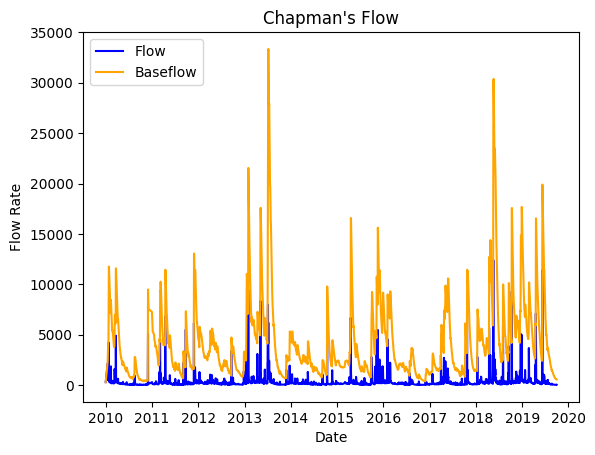

In [16]:
# @title Chapman Graph
flow = hydproj_df['flow'].values
time = hydproj_df['datetime']
baseflow = chapman(hydproj_df, k, dt)
hydproj_df['Chapman'] = baseflow

plt.plot(time, flow, color='blue', label = 'Flow')
plt.plot(time, baseflow, color = 'orange', label = 'Baseflow')
plt.title("Chapman's Flow")
plt.xlabel('Date')
plt.ylabel('Flow Rate')

plt.legend()
plt.show()

# Eckhardt Method

In [17]:
def eckhardt (hydproj_df, k, dt, gamma):
  streamflow = hydproj_df['flow'].values
  n= len(streamflow)
  baseflow = np.zeros(n)
  baseflow[0] = k *streamflow[0]
  for i in range(1, n):
    baseflow[i] = k * streamflow[i] + dt * baseflow[i-1] + gamma * max(streamflow[i] - k * streamflow[i-1] - dt * baseflow[i-1], 0)
  return baseflow

k, dt, gamma = [0.95, 0.7, 0.3] # constants

baseflow = eckhardt(hydproj_df, k, dt, gamma)
hydproj_df['Eckhardt'] = baseflow



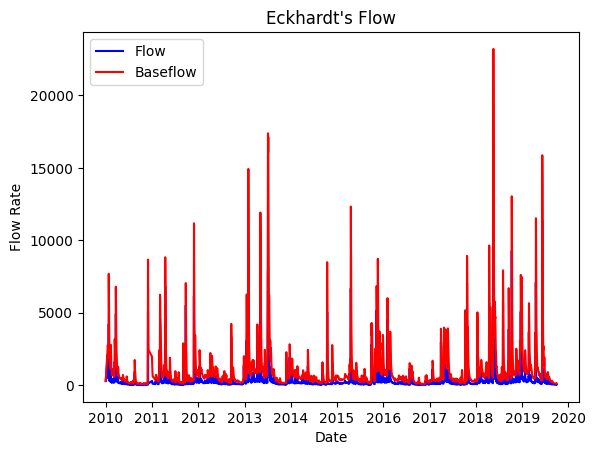

In [18]:
# @title Eckhardt Graph
baseflow = eckhardt(hydproj_df, k, dt, gamma)
hydproj_df['Eckhardt'] = baseflow

plt.plot(time, flow, color='blue', label = 'Flow')
plt.plot(time, baseflow, color = 'red', label = 'Baseflow')
plt.title("Eckhardt's Flow")
plt.xlabel('Date')
plt.ylabel('Flow Rate')

plt.legend()
plt.show()

# Boughton Method

In [19]:
import numpy as np
import pandas as pd

def boughton(hydproj_df, C, K):
    """
    Calculate hydrograph using Boughton method.

    Parameters:
    hydproj_df (DataFrame): Input hydrological projections data.
    C (float): Runoff coefficient.
    K (float): Time-to-peak factor.


    """
    # Extract relevant data from hydproj_df
    # You might need to modify this depending on your data structure
    streamflow = hydproj_df['flow'].values

    # Initialize variables
    baseflow = np.zeros(len(streamflow))

    # Calculate hydrograph using Boughton method
    for i in range(len(streamflow)):
        baseflow[i] = C * streamflow[i] * (i ** K)

    return baseflow

C, K = [0.5, 0.2] # constants
baseflow = boughton(hydproj_df, C, K)
hydproj_df['Boughton'] = baseflow





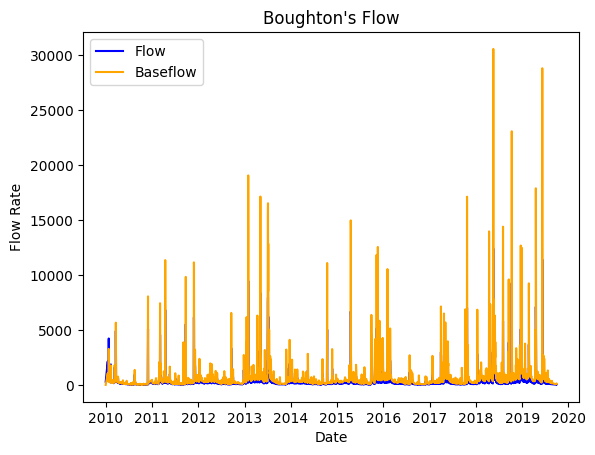

In [20]:
# @title Boughton Graph
baseflow = boughton(hydproj_df,C,K)
hydproj_df['Boughton'] = baseflow

plt.plot(time, flow, color='blue', label = 'Flow')
plt.plot(time, baseflow, color = 'orange', label = 'Baseflow')
plt.title("Boughton's Flow")
plt.xlabel('Date')
plt.ylabel('Flow Rate')

plt.legend()
plt.show()

# Threshold

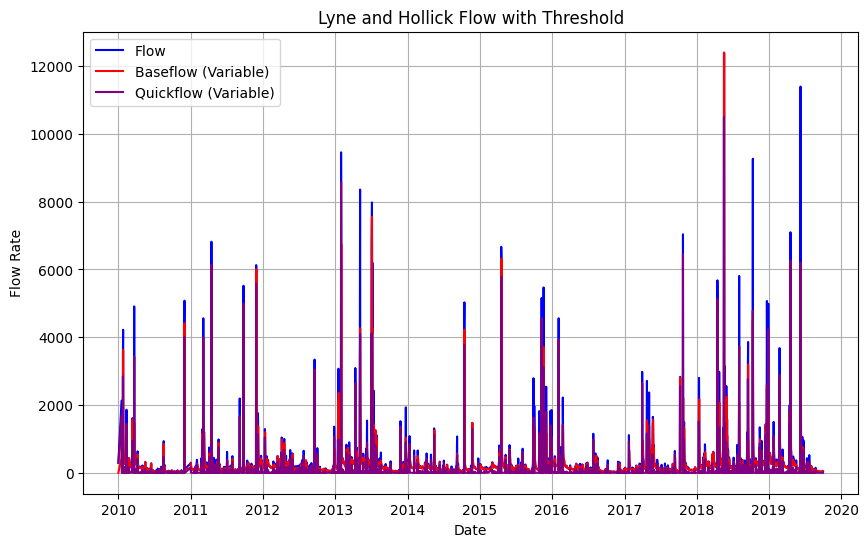

In [21]:
# @title Lyne and Hollick with Threshold
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def lyne_hollick(hydproj_df, k, dt, threshold_fixed=0, threshold_variable=0):
    streamflow = hydproj_df['flow'].values
    baseflow_fixed = np.zeros(len(streamflow))
    baseflow_variable = np.zeros(len(streamflow))

    for i in range(1, len(streamflow)):
        recession = k * dt
        if streamflow[i] <= streamflow[i-1]:
            baseflow_fixed[i] = streamflow[i]
            baseflow_variable[i] = streamflow[i]
        else:
            baseflow_fixed[i] = max(streamflow[i] - recession * (streamflow[i] - streamflow[i-1]), threshold_fixed)
            baseflow_variable[i] = max(streamflow[i] - recession * (streamflow[i] - streamflow[i-1]), threshold_variable)

    quickflow_fixed = streamflow - baseflow_fixed
    quickflow_variable = streamflow - baseflow_variable

    return quickflow_fixed, baseflow_fixed, quickflow_variable, baseflow_variable



# Set the parameters for baseflow separation
k = 0.925  # Recession constant
dt = 1  # Time step (in days)
threshold_fixed = 10  # Threshold for the fixed method
threshold_variable = 5  # Threshold for the variable method

# Call the lyne_hollick function with threshold values
quickflow_fixed, baseflow_fixed, quickflow_variable, baseflow_variable = lyne_hollick(hydproj_df, k, dt, threshold_fixed, threshold_variable)

# Plotting the results
plt.figure(figsize=(10, 6))

plt.plot(hydproj_df['datetime'], hydproj_df['flow'], color='blue', label='Flow')
# plt.plot(hydproj_df['datetime'], baseflow_fixed, color='orange', label='Baseflow (Fixed)')
# plt.plot(hydproj_df['datetime'], quickflow_fixed, color='green', label='Quickflow (Fixed)')
plt.plot(hydproj_df['datetime'], baseflow_variable, color='red', label='Baseflow (Variable)')
plt.plot(hydproj_df['datetime'], quickflow_variable, color='purple', label='Quickflow (Variable)')

plt.title("Lyne and Hollick Flow with Threshold")
plt.xlabel('Date')
plt.ylabel('Flow Rate')
plt.legend()
plt.grid(True)
plt.show()


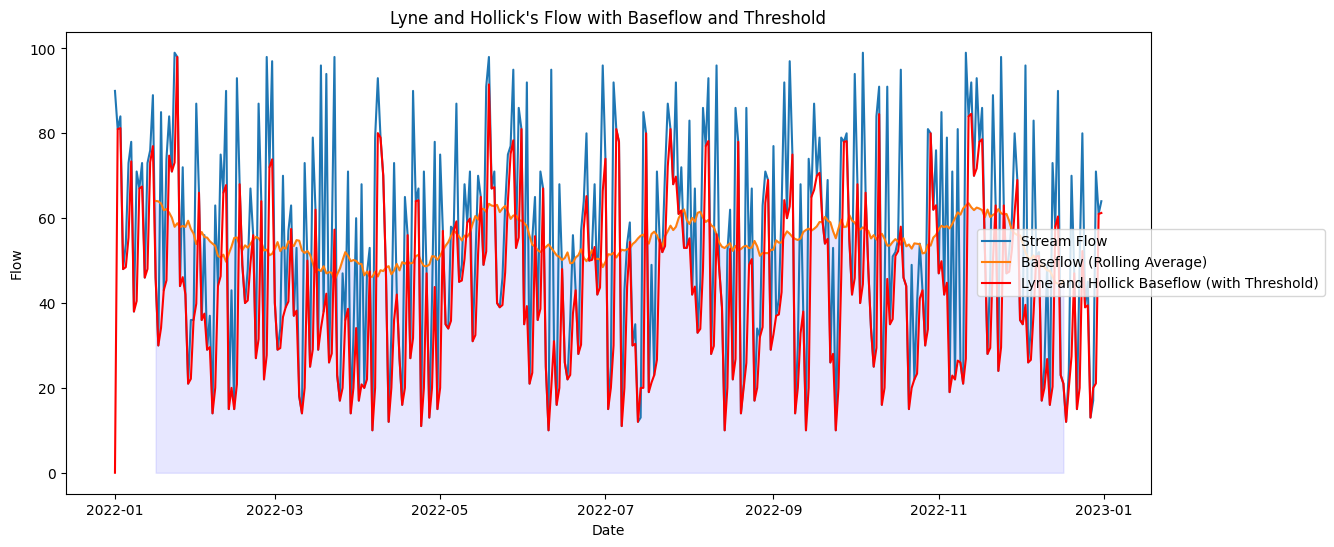

In [30]:
# @title Other LH threshold

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Sample data loading (replace with your data loading)
data = {
    'datetime': pd.date_range(start='2022-01-01', periods=365, freq='D'),
    'flow': np.random.randint(10, 100, size=365)
}
hydproj_df = pd.DataFrame(data)

def lh_threshold(hydproj_df, k, dt, threshold=0):
    streamflow = hydproj_df['flow'].values
    n = len(streamflow)
    baseflow = np.zeros(n)
    for i in range(1, n):
        recession = k * dt
        if streamflow[i] <= streamflow[i-1]:
            baseflow[i] = streamflow[i]
        else:
            baseflow[i] = max(streamflow[i] - recession * (streamflow[i] - streamflow[i-1]), threshold)
    return baseflow

# Set the parameters for baseflow separation
k = 0.925  # Recession constant
dt = 1  # Time step (in days)

# Call the lyne_hollick_with_threshold function
threshold = 20  # Adjust the threshold value as needed
baseflow_lyne_hollick = lh_threshold(hydproj_df, k, dt, threshold)
hydproj_df['Lyne_Hollick_baseflow'] = baseflow_lyne_hollick

# Plotting the results
plt.figure(figsize=(14, 6))
plt.plot(hydproj_df['datetime'], hydproj_df['flow'], label='Stream Flow')

# Apply a rolling average to smooth the data
roll_avg = hydproj_df['flow'].rolling(window=30, center=True).mean()

# Plot the rolling average as the baseflow
plt.plot(hydproj_df['datetime'], roll_avg, label='Baseflow (Rolling Average)')
plt.fill_between(hydproj_df['datetime'], roll_avg, color='blue', alpha=0.1)

# Plot the Lyne and Hollick baseflow with threshold
plt.plot(hydproj_df['datetime'], baseflow_lyne_hollick, color='red', label='Lyne and Hollick Baseflow (with Threshold)')
plt.fill_between(hydproj_df['datetime'], baseflow_lyne_hollick, color='white', alpha=0.1)

plt.title("Lyne and Hollick's Flow with Baseflow and Threshold")
plt.xlabel('Date')
plt.ylabel('Flow')

plt.legend(loc='center', bbox_to_anchor=(1, 0.5))  # Moving the legend outside the plot

plt.show()



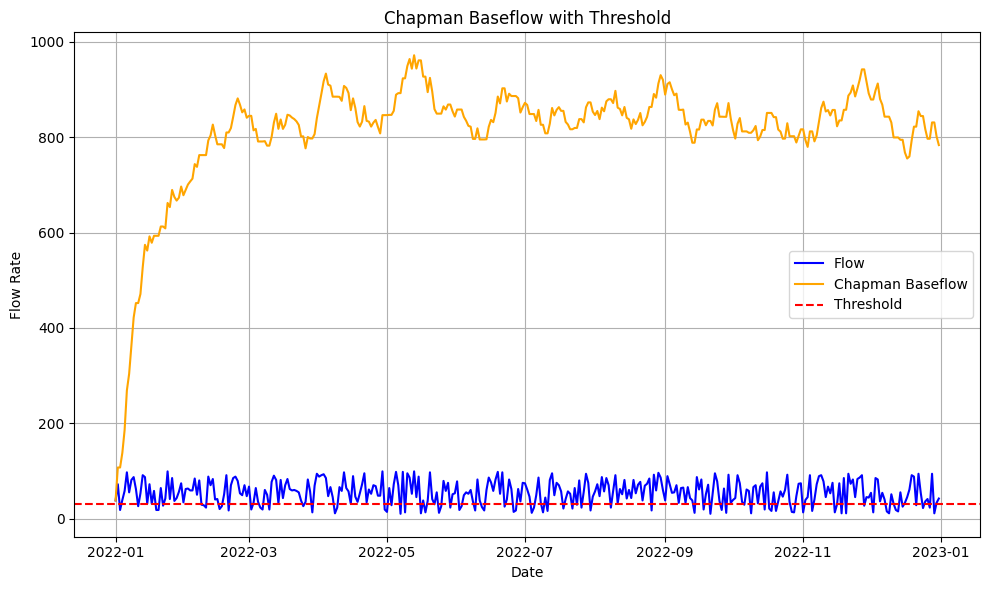

In [26]:
# @title Chapman Threshold

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Sample data loading (replace with your data loading)
data = {
    'datetime': pd.date_range(start='2022-01-01', periods=365, freq='D'),
    'flow': np.random.randint(10, 100, size=365)
}
hydproj_df = pd.DataFrame(data)

def chapman_threshold(hydproj_df, k, dt, threshold=0):
    streamflow = hydproj_df['flow'].values
    n = len(streamflow)
    baseflow = np.zeros(n)
    baseflow[0] = streamflow[0]

    for i in range(1, len(hydproj_df)):
        if streamflow[i] >= threshold:
            baseflow[i] = k * baseflow[i-1] + dt * streamflow[i]
        else:
            baseflow[i] = baseflow[i-1]

    return baseflow

# Set the parameters for baseflow separation
k = 0.925  # Recession constant (alpha)
dt = 1  # Time step (in days) (beta)

# Call the chapman_with_threshold function
threshold = 30  # Adjust the threshold value as needed
baseflow_chapman = chapman_threshold(hydproj_df, k, dt, threshold)
hydproj_df['Chapman'] = baseflow_chapman

# Plotting the results
plt.figure(figsize=(10, 6))

plt.plot(hydproj_df['datetime'], hydproj_df['flow'], color='blue', label='Flow')
plt.plot(hydproj_df['datetime'], baseflow_chapman, color='orange', label='Chapman Baseflow')

plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')

plt.xlabel('Date')
plt.ylabel('Flow Rate')
plt.title('Chapman Baseflow with Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


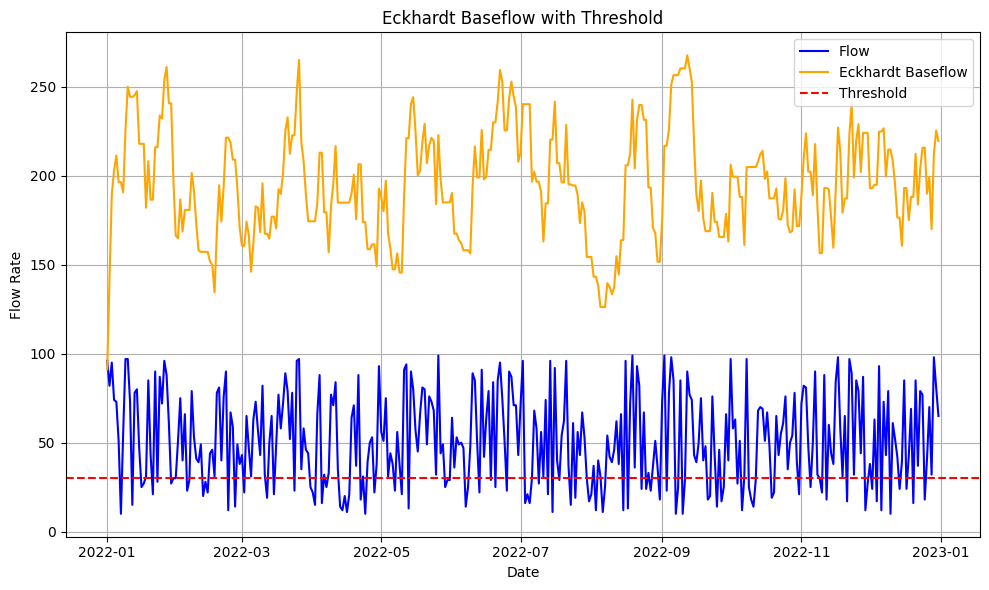

In [27]:
# @title Eckhardt Threshold

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Sample data loading (replace with your data loading)
data = {
    'datetime': pd.date_range(start='2022-01-01', periods=365, freq='D'),
    'flow': np.random.randint(10, 100, size=365)
}
hydproj_df = pd.DataFrame(data)

def eckhardt_threshold(hydproj_df, k, dt, gamma, threshold=0):
    streamflow = hydproj_df['flow'].values
    n = len(streamflow)
    baseflow = np.zeros(n)
    baseflow[0] = k * streamflow[0]

    for i in range(1, n):
        if streamflow[i] >= threshold:
            baseflow[i] = k * streamflow[i] + dt * baseflow[i-1] + gamma * max(streamflow[i] - k * streamflow[i-1] - dt * baseflow[i-1], 0)
        else:
            baseflow[i] = baseflow[i-1]

    return baseflow

# Constants
k, dt, gamma = [0.95, 0.7, 0.3]

# Call the eckhardt_with_threshold function
threshold = 30  # Adjust the threshold value as needed
baseflow_eckhardt = eckhardt_threshold(hydproj_df, k, dt, gamma, threshold)
hydproj_df['Eckhardt'] = baseflow_eckhardt

# Plotting the results
plt.figure(figsize=(10, 6))

plt.plot(hydproj_df['datetime'], hydproj_df['flow'], color='blue', label='Flow')
plt.plot(hydproj_df['datetime'], baseflow_eckhardt, color='orange', label='Eckhardt Baseflow')

plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')

plt.xlabel('Date')
plt.ylabel('Flow Rate')
plt.title('Eckhardt Baseflow with Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


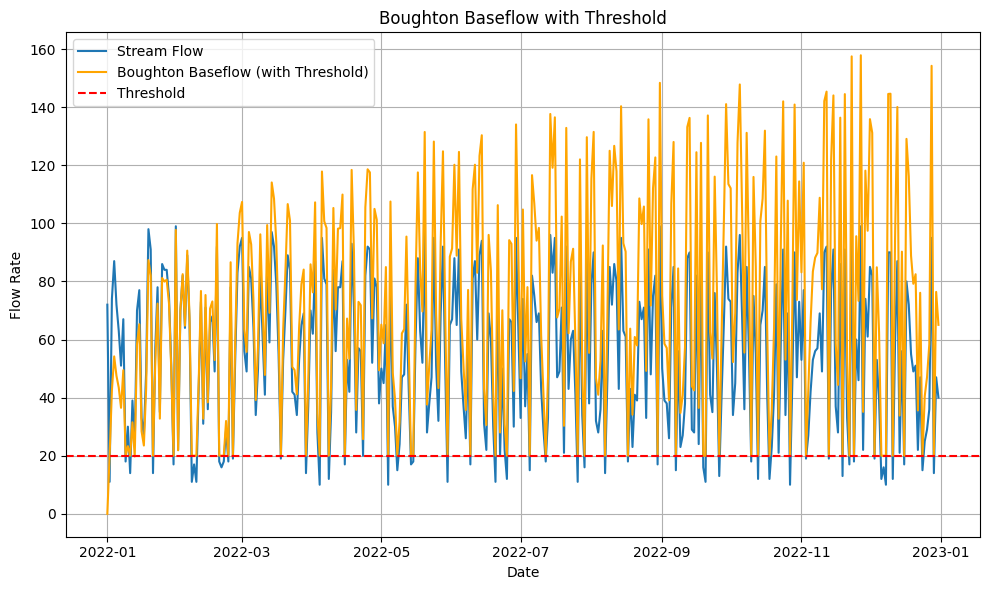

In [31]:
# @title Boughton threshold

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Sample data loading (replace with your data loading)
data = {
    'datetime': pd.date_range(start='2022-01-01', periods=365, freq='D'),
    'flow': np.random.randint(10, 100, size=365)
}
hydproj_df = pd.DataFrame(data)

def boughton_threshold(hydproj_df, C, K, threshold=0):
    streamflow = hydproj_df['flow'].values
    n = len(streamflow)
    baseflow = np.zeros(n)

    for i in range(len(streamflow)):
        if streamflow[i] >= threshold:
            baseflow[i] = C * streamflow[i] * (i ** K)
        else:
            baseflow[i] = threshold

    return baseflow

# Constants
C, K = [0.5, 0.2]

# Call the boughton_with_threshold function
threshold = 20  # Adjust the threshold value as needed
baseflow_boughton = boughton_threshold(hydproj_df, C, K, threshold)
hydproj_df['Boughton'] = baseflow_boughton

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(hydproj_df['datetime'], hydproj_df['flow'], label='Stream Flow')

# Plot the Boughton baseflow with threshold
plt.plot(hydproj_df['datetime'], baseflow_boughton, color='orange', label='Boughton Baseflow (with Threshold)')

plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')

plt.xlabel('Date')
plt.ylabel('Flow Rate')
plt.title('Boughton Baseflow with Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



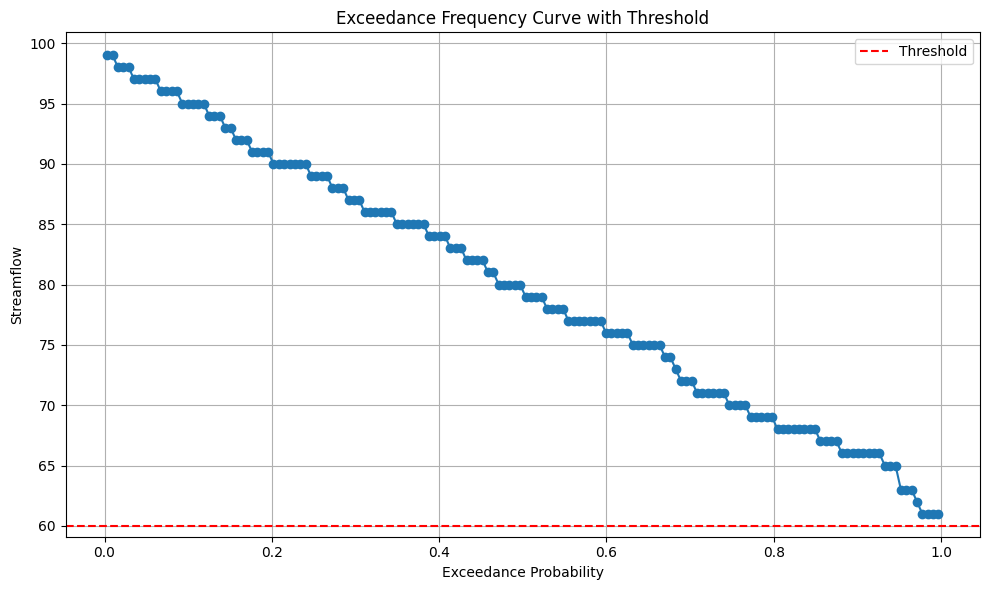

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Sample data loading (replace with your data loading)
data = {
    'datetime': pd.date_range(start='2022-01-01', periods=365, freq='D'),
    'flow': np.random.randint(10, 100, size=365)
}
hydproj_df = pd.DataFrame(data)

# Calculate exceedance frequency with threshold
def exceedance_frequency(hydproj_df, threshold):
    streamflow_above_threshold = hydproj_df[hydproj_df['flow'] > threshold]
    streamflow_sorted = np.sort(streamflow_above_threshold['flow'])[::-1]
    ranks = np.arange(1, len(streamflow_sorted) + 1)
    exceedance_prob = (ranks - 0.5) / len(streamflow_sorted)

    return exceedance_prob, streamflow_sorted

# Call the function to calculate exceedance frequency with threshold
threshold = 60  # Adjust the threshold value as needed
exceedance_prob, streamflow_sorted = exceedance_frequency(hydproj_df, threshold)

# Plot the exceedance frequency curve with threshold
plt.figure(figsize=(10, 6))
plt.plot(exceedance_prob, streamflow_sorted, marker='o', linestyle='-')
plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')
plt.xlabel('Exceedance Probability')
plt.ylabel('Streamflow')
plt.title('Exceedance Frequency Curve with Threshold')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Other Threshold Method

In [22]:
hydproj_df['day_of_year'] = hydproj_df['datetime'].dt.dayofyear
hydproj_df['week_of_year'] = hydproj_df['datetime'].dt.isocalendar().week
hydproj_df['month_of_year'] = hydproj_df['datetime'].dt.month




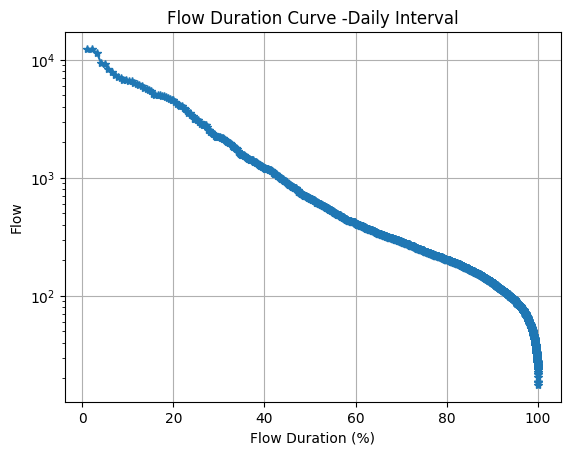

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

def flow_duration_curve(hydproj_df, interval='year', flow_column='flow'):
    """
    Draw a flow duration curve based on the specified interval (year, month, or week).

    Parameters:
        data_df (DataFrame): DataFrame containing year, week, day, and flow columns.
        interval (str, optional): The interval to group the data by. Default is 'year'.
        flow_column (str, optional): Name of the flow column. Default is 'flow'.

    Returns:
        None: Plots the flow duration curve.
    """
    # Sort the data by flow in descending order
    hydproj_df = hydproj_df.sort_values(flow_column, ascending=False)

    # Calculate cumulative flow percentage
    hydproj_df['cumulative_percentage'] = (hydproj_df[flow_column].cumsum() / hydproj_df[flow_column].sum()) * 100

    # Plot the flow duration curve
    plt.plot(hydproj_df['cumulative_percentage'], hydproj_df[flow_column],'*-')
    plt.yscale('log')
    plt.xlabel('Flow Duration (%)')
    plt.ylabel('Flow')
    plt.title('Flow Duration Curve -Daily Interval')
    plt.grid(True)
    plt.show()
flow_duration_curve(hydproj_df, flow_column='flow')

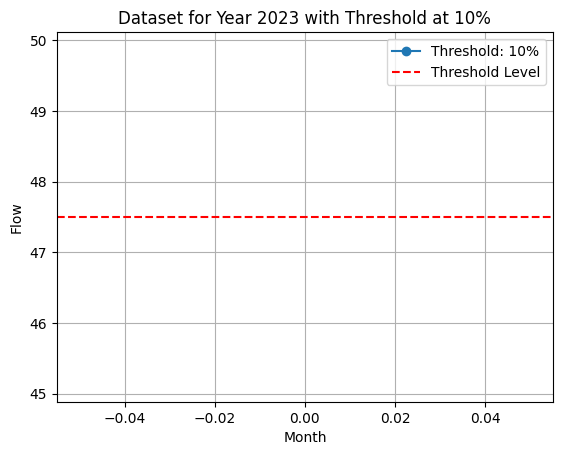

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

def select_dataset_by_threshold(hydproj_df, year, interval, threshold_percentage, flow_column='flow'):
    # Filter data for the selected year
    data_year = hydproj_df[hydproj_df['year'] == year]

    # Group the data based on the selected interval
    data_interval = data_year.groupby(interval).agg({flow_column: 'max'}).reset_index()

    # Calculate the flow threshold value based on the threshold percentage
    flow_threshold = hydproj_df[flow_column].quantile(threshold_percentage / 100)

    # Select data points above the threshold value
    selected_data = data_interval[data_interval[flow_column] >= flow_threshold]

    return selected_data



# Call the function to select the dataset based on the threshold
year = 2023
interval = 'month'  # 'day', 'week', or 'month'
threshold_percentage = 10  # Threshold percentage (e.g., 10%)
dataset = select_dataset_by_threshold(hydproj_df, year, interval, threshold_percentage, flow_column='flow')

# Plot the dataset
# Plot the dataset and threshold level
plt.plot(dataset[interval], dataset['flow'], marker='o', linestyle='-', label=f'Threshold: {threshold_percentage}%')
plt.axhline(y=hydproj_df['flow'].quantile(threshold_percentage / 100), color='r', linestyle='--', label='Threshold Level')
plt.xlabel(interval.capitalize())
plt.ylabel('Flow')
plt.title(f'Dataset for Year {year} with Threshold at {threshold_percentage}%')
plt.grid(True)
plt.legend()
plt.show()


Calculated Flow Threshold: 47.5


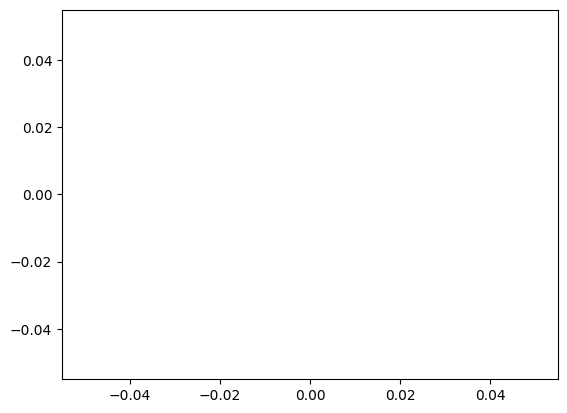

In [25]:
hydproj_df['year'] = hydproj_df['year'].astype(int)
hydproj_df['month'] = hydproj_df['month'].astype(int)

flow_threshold = hydproj_df['flow'].quantile(threshold_percentage / 100)
print(f"Calculated Flow Threshold: {flow_threshold}")

plt.plot(dataset[interval], dataset['flow'], marker='o', linestyle='-', label=f'Threshold: {threshold_percentage}%')
plt.show()  # Display only this plot and check if it shows correctly
